In [2]:
import pandas as pd
import glob

# Zoek alle .txt bestanden in de huidige map
txt_bestanden = glob.glob("*.txt")

print(txt_bestanden)



['001. Kraanbaan.txt', '002. Kraanbaan (1).txt', '002. Kraanbaan.txt', '003. Kraanbanen.txt']


In [9]:
import pandas as pd
import glob

def read_txt_file(map_path=".", sep=","):
    """
    Leest alle .txt bestanden in een opgegeven map en zet ze om naar pandas DataFrames.

    Parameters:
    - map_path (str): Pad naar de map met tekstbestanden (standaard huidig).
    - sep (str): Scheidingsteken in de bestanden (standaard ",").

    Returns:
    - dict: Een dictionary met bestandsnamen als sleutel en pandas DataFrames als waarde.
    """
    # Zoek alle .txt bestanden in de map
    txt_files = glob.glob(f"{map_path}/*.txt")

    # Kolomnamen voor de DataFrame
    column_header = ["punt_id", "x", "y", "z", "omschrijving"]

    # Dictionary om DataFrames op te slaan
    dfs = {}

    for bestand in txt_bestanden:
        try:
            # Lees het bestand in als een DataFrame
            df = pd.read_csv(bestand, sep=sep, header=None, names=column_header, skipinitialspace=True)

            # Opslaan in de dictionary met bestandsnaam als sleutel
            dfs[bestand] = df

            print(f"✅ Ingeladen: {bestand}, {df.shape[0]} rijen")

        except Exception as e:
            print(f"❌ Fout bij {bestand}: {e}")

    return dfs

# Gebruik de functie
dataframes = lees_txt_bestanden()

# Voorbeeld: toon de eerste rijen van het eerste bestand
for naam, df in dataframes.items():
    print(f"\n📄 Bestand: {naam}")
    print(df.head())  # Toon de eerste 5 rijen
    break  # Stop na eerste bestand tonen


✅ Ingeladen: .\001. Kraanbaan.txt, 1067 rijen
✅ Ingeladen: .\002. Kraanbaan (1).txt, 651 rijen
✅ Ingeladen: .\002. Kraanbaan.txt, 651 rijen
✅ Ingeladen: .\003. Kraanbanen.txt, 2946 rijen

📄 Bestand: .\001. Kraanbaan.txt
  punt_id         x        y       z omschrijving
0  GSR001  1018.794  975.065  18.937      GRNDSLG
1  GSR001  1018.793  975.066  18.936      GRNDSLG
2  GSR001  1018.794  975.065  18.936      GRNDSLG
3  GSR002  1018.324  982.810  22.205      GRNDSLG
4  GSR002  1018.323  982.810  22.206      GRNDSLG


In [34]:
print(df0)

     point_id         x        y       z description
0      GSR001  1018.794  975.065  18.937     GRNDSLG
1      GSR001  1018.793  975.066  18.936     GRNDSLG
2      GSR001  1018.794  975.065  18.936     GRNDSLG
3      GSR002  1018.324  982.810  22.205     GRNDSLG
4      GSR002  1018.323  982.810  22.206     GRNDSLG
...       ...       ...      ...     ...         ...
1062    31093   865.365  967.050  32.655    --------
1063    31094   865.642  967.063  32.656    --------
1064    31095   865.902  967.077  32.657    --------
1065    31096   866.152  967.089  32.656    --------
1066    31097   866.436  967.105  32.656    --------

[1067 rows x 5 columns]


✅ Loaded: .\001. Kraanbaan.txt, 1067 rows 	→ df0
✅ Loaded: .\002. Kraanbaan (1).txt, 651 rows 	→ df1
✅ Loaded: .\002. Kraanbaan.txt, 651 rows 	→ df2
✅ Loaded: .\003. Kraanbanen.txt, 2946 rows 	→ df3


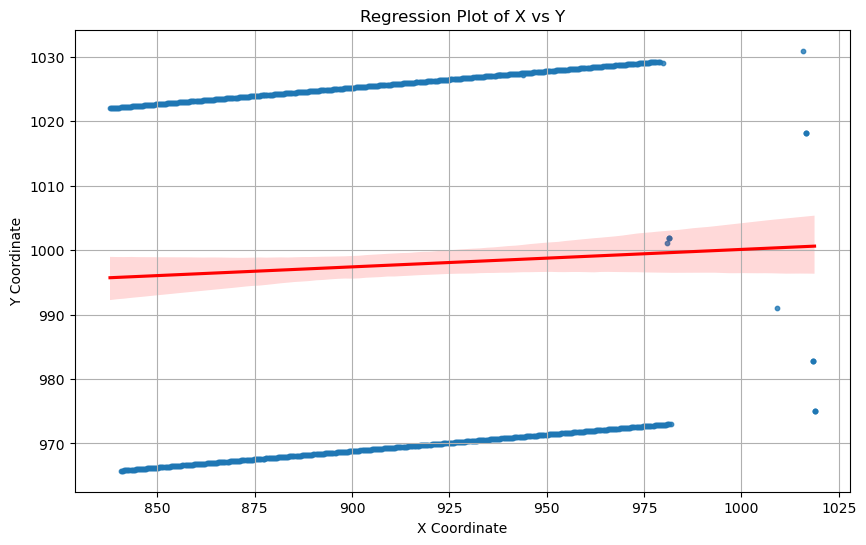

In [32]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

def read_txt_files(directory=".", sep=","):
    """
    Reads all .txt files in the specified directory and converts them into pandas DataFrames.

    Parameters:
    - directory (str): Path to the folder containing text files (default: current directory).
    - sep (str): Delimiter used in the files (default: ",").

    Returns:
    - dict: A dictionary with filenames as keys and pandas DataFrames as values.
    - list: A list of dynamically named DataFrames (df0, df1, ...).
    """
    # Find all .txt files in the directory
    txt_files = glob.glob(f"{directory}/*.txt")

    # Column headers for the DataFrame
    column_headers = ["point_id", "x", "y", "z", "description"]

    # Dictionary to store DataFrames with filenames as keys
    dfs_dict = {}

    # List to store DataFrames with dynamic variable names (df0, df1, ...)
    dfs_list = []

    for index, file in enumerate(txt_files):
        try:
            # Read the file into a DataFrame
            df = pd.read_csv(file, sep=sep, header=None, names=column_headers, skipinitialspace=True)

            # Store in dictionary
            dfs_dict[file] = df

            # Assign DataFrame dynamically as df0, df1, df2, ...
            df_variable_name = f"df{index}"
            globals()[df_variable_name] = df
            dfs_list.append(df)

            print(f"✅ Loaded: {file}, {df.shape[0]} rows \t→ {df_variable_name}")

        except Exception as e:
            print(f"❌ Error loading {file}: {e}")

    return dfs_dict, dfs_list

# Run function
dataframes_dict, dataframes_list = read_txt_files()

# Check if df0 exists before plotting
if len(dataframes_list) > 0:
    df0 = dataframes_list[0]  # First DataFrame

    # Convert x and y to numeric in case of errors
    df0["x"] = pd.to_numeric(df0["x"], errors="coerce")
    df0["y"] = pd.to_numeric(df0["y"], errors="coerce")

    # Drop NaN values
    df0 = df0.dropna(subset=["x", "y"])

    # Create regression plot
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df0["x"], y=df0["y"], scatter_kws={"s": 10}, line_kws={"color": "red"})
    
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title("Regression Plot of X vs Y")
    plt.grid(True)

    # Show plot
    plt.show()


In [24]:
import pandas as pd
import glob

def read_txt_files(directory=".", sep=","):
    """
    Reads all .txt files in the specified directory and converts them into pandas DataFrames.

    Parameters:
    - directory (str): Path to the folder containing text files (default: current directory).
    - sep (str): Delimiter used in the files (default: ",").

    Returns:
    - dict: A dictionary with filenames as keys and pandas DataFrames as values.
    - list: A list of dynamically named DataFrames (df0, df1, ...).
    """
    # Find all .txt files in the directory
    txt_files = glob.glob(f"{directory}/*.txt")

    # Column headers for the DataFrame
    column_headers = ["point_id", "x", "y", "z", "description"]

    # Dictionary to store DataFrames with filenames as keys
    dfs_dict = {}

    # List to store DataFrames with dynamic variable names (df0, df1, ...)
    dfs_list = []

    for index, file in enumerate(txt_files):
        try:
            # Read the file into a DataFrame
            df = pd.read_csv(file, sep=sep, header=None, names=column_headers, skipinitialspace=True)

            # Store in dictionary
            dfs_dict[file] = df

            # Assign DataFrame dynamically as df0, df1, df2, ...
            df_variable_name = f"df{index}"
            globals()[df_variable_name] = df
            dfs_list.append(df)

            print(f"✅ Loaded: {file}, {df.shape[0]} rows \t → {df_variable_name}")

        except Exception as e:
            print(f"❌ Error loading {file}: {e}")

    return dfs_dict, dfs_list

# Run function
dataframes_dict, dataframes_list = read_txt_files()

# Example: Show the first rows of the first DataFrame
if dataframes_list:
    print("\n📄 First loaded DataFrame:")
    print(dataframes_list[3].head())  # Show first 5 rows


✅ Loaded: .\001. Kraanbaan.txt, 1067 rows 	 → df0
✅ Loaded: .\002. Kraanbaan (1).txt, 651 rows 	 → df1
✅ Loaded: .\002. Kraanbaan.txt, 651 rows 	 → df2
✅ Loaded: .\003. Kraanbanen.txt, 2946 rows 	 → df3

📄 First loaded DataFrame:
            point_id            x          y                z description
0         Puntnr XYZ          NaN        NaN              NaN         NaN
1  0523-1230\t     0  000\t     0  000\t   0  000\t  --------         NaN
2     ST01-A\t   140  908\t   -54  232\t   1  996\t  --------         NaN
3    ST02-12\t   116  342\t    25  312\t   1  879\t  --------         NaN
4  ST03-HOEK\t   111  236\t    63  125\t   3  062\t  --------         NaN


In [20]:
df3

,point_id,x,y,z,description
0,Puntnr XYZ,NaN,NaN,NaN,NaN
1,0523-1230\t 0,000\t 0,000\t 0,000\t --------,NaN
2,ST01-A\t 140,908\t -54,232\t 1,996\t --------,NaN
3,ST02-12\t 116,342\t 25,312\t 1,879\t --------,NaN
4,ST03-HOEK\t 111,236\t 63,125\t 3,062\t --------,NaN
...,...,...,...,...,...
2941,3,2377\t 139,128\t 55,847\t 8,083\t --------
2942,K3,1\t 59,615\t 40,890\t 9,183\t --------
2943,K3,2\t 61,857\t 41,515\t 8,370\t --------
2944,K3,3\t 68,666\t 74,682\t 9,145\t --------


In [39]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# Inlezen van de dataset
file_path = 'cleaned_data.csv'  # Vervang dit door je bestandspad
data = pd.read_csv(file_path)

# Controleer of de juiste kolommen aanwezig zijn
if {'x', 'y', 'z'}.issubset(data.columns):
    # Data voorbereiden
    x = df0['x'].values.reshape(-1, 1)  # Onafhankelijke variabele (kleine letters)
    y = df0['y'].values  # Onafhankelijke variabele (voor 3D)
    z = df0['z'].values  # Afhankelijke variabele (kleine letters)

    # Lineaire regressie (op basis van x en z)
    model = LinearRegression()
    model.fit(x, z)

    # Voorspelde waarden en buffer
    z_pred = model.predict(x)
    buffer_size = 0.0025  # Buffergrootte in meters (2.5 mm)
    z_upper = z_pred + buffer_size
    z_lower = z_pred - buffer_size

    # Data categoriseren
    within_buffer = (z >= z_lower) & (z <= z_upper)
    outside_buffer = ~within_buffer

    binnen_data = data[within_buffer]
    buiten_data = data[outside_buffer]

    # Interactieve 3D-plot maken
    fig = go.Figure()

    # Alle data
    fig.add_trace(go.Scatter3d(
        x=data['x'], y=data['y'], z=data['z'],
        mode='markers',
        marker=dict(size=3, color='blue', opacity=0.3),
        name='Alle data'
    ))

    # Binnen buffer
    fig.add_trace(go.Scatter3d(
        x=binnen_data['x'], y=binnen_data['y'], z=binnen_data['z'],
        mode='markers',
        marker=dict(size=5, color='green'),
        name='Binnen buffer'
    ))

    # Buiten buffer
    fig.add_trace(go.Scatter3d(
        x=buiten_data['x'], y=buiten_data['y'], z=buiten_data['z'],
        mode='markers',
        marker=dict(size=5, color='red'),
        name='Buiten buffer'
    ))

    # Regressielijn
    fig.add_trace(go.Scatter3d(
        x=data['x'], y=data['y'], z=z_pred,
        mode='lines',
        line=dict(color='red', width=3),
        name='Regressielijn'
    ))

    # Buffergrenzen
    fig.add_trace(go.Scatter3d(
        x=data['x'], y=data['y'], z=z_upper,
        mode='lines',
        line=dict(color='orange', dash='dash', width=1),
        name='Bovengrens buffer'
    ))
    fig.add_trace(go.Scatter3d(
        x=data['x'], y=data['y'], z=z_lower,
        mode='lines',
        line=dict(color='orange', dash='dash', width=1),
        name='Ondergrens buffer'
    ))

    # Layout van de grafiek
    fig.update_layout(
        title="Interactieve 3D Plot met Buffer en Regressielijn",
        scene=dict(
            xaxis_title="X (meter)",
            yaxis_title="Y (meter)",
            zaxis_title="Z (meter)"
        ),
        legend_title="Legenda",
        template="plotly_white"
    )

    # Grafiek tonen
    fig.show()

    # Opslaan van binnen- en buitenliggende data
    binnen_data.to_csv('binnen_buffer_data.csv', index=False)
    buiten_data.to_csv('buiten_buffer_data.csv', index=False)
    print("Data binnen de buffer is opgeslagen in 'binnen_buffer_data.csv'")
    print("Data buiten de buffer is opgeslagen in 'buiten_buffer_data.csv'")
else:
    print("De dataset mist één of meer vereiste kolommen: 'x', 'y' en 'z'")

ValueError: Item wrong length 1067 instead of 119.